In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Tensor, graph, session

In [25]:
# a tensor
x = tf.linspace(-5.,5.,100)
print x.get_shape()

(100,)


In [5]:
# tensor graph
g = tf.get_default_graph()
[operation.name for operation in g.get_operations()]

[u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace']

In [14]:
# session
sess = tf.Session()
print "run session:", sess.run(x)
print "eval tensor:", x.eval(session=sess)

# interactive
sess = tf.InteractiveSession()
print "interactive:", x.eval()

run session: [-5.         -1.66666675  1.66666651  5.        ]
eval tensor: [-5.         -1.66666675  1.66666651  5.        ]
interactive: [-5.         -1.66666675  1.66666651  5.        ]


## Math operations

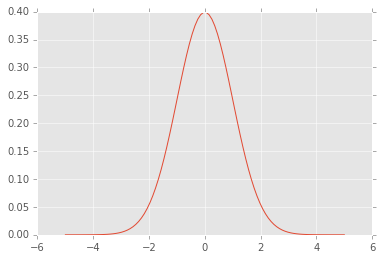

In [38]:
mean = 0
sigma2 = 1

y = (1./tf.sqrt(2*np.pi*sigma2))*tf.exp(-(x-mean)**2/(2*sigma2))
plt.plot(x.eval(),y.eval())

## Convolution

### Gaussian

<type 'int'>
<class 'tensorflow.python.framework.ops.Tensor'> (100,)


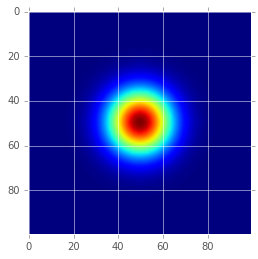

In [61]:
n = y.get_shape().as_list()[0]
print type(n)
print type(y), y.get_shape()

# 2D gaussian
gauss2d = tf.matmul(tf.reshape(y,[n,1]), tf.reshape(y,[1,n]))
plt.imshow(mat.eval())

### Format data in 4D tensor

(512, 512)


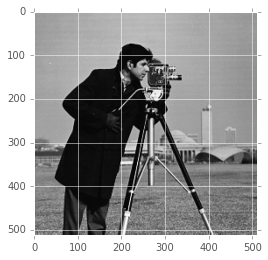

In [58]:
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

In [62]:
# images need to be N * H * W * C
img_4d = tf.reshape(img,[1,img.shape[0],img.shape[1],1])

# 2d kernel in tensorflow require 4d format: H x W x I x O
gauss_4d = tf.reshape(gauss2d, [n,n,1,1])

### Gaussian kernel convolution

In [67]:
convolved = tf.nn.conv2d(img_4d, gauss_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print res.shape

(1, 512, 512, 1)


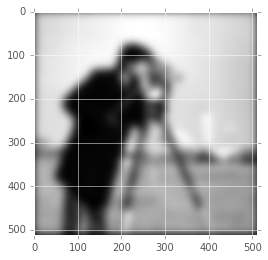

In [69]:
plt.imshow(res[0,:,:,0], cmap='gray')

### Gabor kernel convolution

<type 'int'>


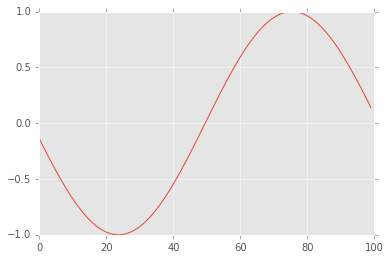

In [79]:
x = tf.linspace(-3., 3., n)
y = tf.sin(x)
plt.plot(y.eval())

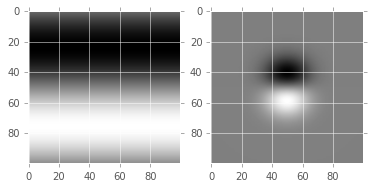

In [96]:
# gabor is gaussian multiplied by sinus
y = tf.reshape(y,[n,1])
ones = tf.ones((1, n))
wave = tf.matmul(y,ones)
f,ax = plt.subplots(1,2)
ax[0].imshow(wave.eval(),cmap='gray')
gabor = tf.mul(wave, gauss2d)
ax[1].imshow(gabor.eval(),cmap='gray')

### Placeholders

In [100]:
# define placeholders
img = tf.placeholder(tf.float32, shape=[None, None], name='img')
img_3d = tf.expand_dims(img, 2)
img_4d = tf.expand_dims(img_3d, 0)
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

# apply previous computations again to placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.pack([ksize, 1])),
  tf.reshape(z, tf.pack([1, ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.pack([ksize, 1]))
ones = tf.ones(tf.pack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.mul(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.pack([ksize, ksize, 1, 1]))

In [101]:
# convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

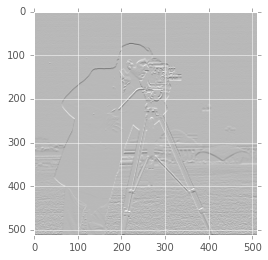

In [108]:
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:0.1, ksize:20})
plt.imshow(res, cmap='gray')